# Python protobuf test

In [9]:
from software.proto.repeated_any_msg_pb2 import RepeatedAnyMsg
from software.proto.sensor_msg_pb2 import SensorProto
from google.protobuf.any_pb2 import Any
from google.protobuf.internal.decoder import _DecodeVarint32
import numpy as np
import matplotlib.pyplot as plt

In [10]:
buf = open('/home/jordan/protologgertest2/SensorProto/0', 'rb').read()
msg_len, new_pos = _DecodeVarint32(buf, 0)
msg_data = buf[new_pos:new_pos + msg_len]
replaymsg = RepeatedAnyMsg()
replaymsg.ParseFromString(msg_data)

sensormsgs = []
for anymsg in replaymsg.messages:
    sensormsg = SensorProto()
    anymsg.Unpack(sensormsg)
    sensormsgs.append(sensormsg)

In [11]:
ssl_detections = []
for sensormsg in sensormsgs:
    if sensormsg.HasField("ssl_vision_msg") and sensormsg.ssl_vision_msg.HasField("detection"):
        ssl_detections.append(sensormsg.ssl_vision_msg.detection)

In [18]:
ball_detections = []

for detection in ssl_detections: 
    ball_detections.extend(detection.balls)
    

ball_xs = [ball.x for ball in ball_detections]
ball_ys = [ball.y for ball in ball_detections]

Text(0.5, 1.0, 'Ball positions')

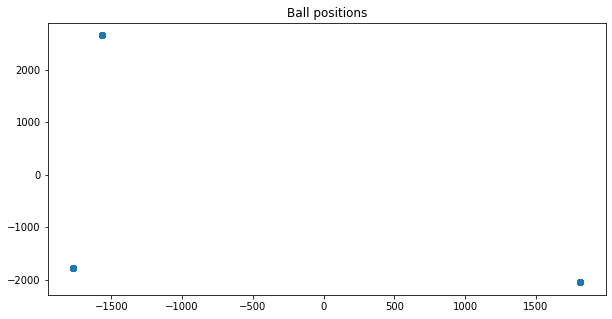

In [23]:
plt.figure(figsize=(10, 5))
plt.scatter(ball_xs, ball_ys)
plt.title("Ball positions")